In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
import itertools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report, confusion_matrix

## 2022.06.16 - NN Classification Part 1
- Purpose:
  - multiclass classification : 1 sample will be predict only one class in multiple classes
  - multilabel classification: 1 sample will be predicted 1...n classes in multiple classes like one article will be belong to the multiple category of article (NLP related)
- output layer activation function is not the cost function that NN use
  - binary classification: sigmoid `1/(1+e^-z)`
  - multi classification: softmax function `(e^z1 / (e^z1+e^z2))
- cost function:
  - binary classification: BinaryCrossEntropy
  - multi classification: CategoricalCrossEntropy

### Classification Exmaple
- import dataset from sklearn
- create decision boundary based on the pre-trained model
  - usually usually use meshgrid and countourf
  - Notes. c_ and ravel

In [2]:
def sigmoid(z):
  return 1 / (1+tf.exp(-z))

def relu_func(z):
  return tf.maximum(0,z)

def linear_func(z):
  return z

def softmax(z,*args):
  total_probs = sum([tf.exp(z_) for z_ in args])
  return z*1.0 /total_probs

def plot_decision_boundary(model,X,y,activation_on_output_layer=True):

  X_min, X_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  # the X axxis and Y axix data point on the plot
  XX, yy = np.meshgrid(np.linspace(X_min,X_max,100),
                        np.linspace(y_min,y_max,100)) 

  X_in = np.c_[XX.ravel(),yy.ravel()]  # prepare the simulated datasets
  y_pred = model.predict(X_in)
  if not activation_on_output_layer:
    y_pred = 1 / (1+tf.exp(-y_pred))
  

  # becauase want to class ID like the index of maximum to make it as the color in the plot, 
  # like use differentt ID represent different color represent different category
  if y_pred.shape[1] > 1:
    print("doing multiclass classifications.")
    y_pred_class = np.argmax(y_pred,axis=1).reshape(XX.shape)
    
  else:
    print("doing binary class classification.")
    y_pred_class = np.round(y_pred).reshape(XX.shape)

  plt.contourf(XX,yy, y_pred_class,cmap=plt.cm.RdYlBu,alpha=0.5)
  plt.scatter(X[:,0],X[:,1], s=40, c = y,cmap=plt.cm.RdYlBu)
  plt.xlim(XX.min(),XX.max())
  plt.ylim(yy.min(),yy.max())

In [3]:
def plot_confusion_matrix(y_true,y_pred,classes=None,figsize=(20,16)):
  fig, ax = plt.subplots(figsize=figsize)

  # only calculate the TPR and FPR
  cm = confusion_matrix(y_true,y_pred)
  c_norm = cm / cm.sum(axis=1)[:,np.newaxis]
  cmt = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cmt)

  # format the ax and make it prettier
  ax.xaxis.set_ticks_position("bottom")
  ax.xaxis.tick_bottom()
  ax.title.set_size(20)
  ax.xaxis.label.set_size(10)
  ax.yaxis.label.set_size(10)

  labels = classes if classes else np.arange(cm.shape[0])

  ax.set(
      title = "Confusion Matrix",
      xlabel = "Predicted Label",
      ylabel = "Actual Label",
      xticks = np.arange(cm.shape[0]),
      yticks = np.arange(cm.shape[0]),
      xticklabels = labels,
      yticklabels = labels
  )

  threshold = (cm.max()+cm.min()) / 2

  # the text cords is same as the screen, the y-axis is going down
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[0])):
    plt.text(j,i,f"{cm[i,j]} ({c_norm[i,j]*100:.1f}%)",
            size=10,
            horizontalalignment="center",
            color = "white" if cm[i,j] > threshold else "black")


In [4]:
n_sample = 1000
X,y = make_circles(n_samples=n_sample,noise=0.03,random_state=42)

In [5]:
data = {
    "X1":X[:,0],
    "X2":X[:,1],
    "label":y
    }
df = pd.DataFrame(data)
# balanced data
df.label.value_counts()

1    500
0    500
Name: label, dtype: int64

In [6]:
X.shape,y.shape

((1000, 2), (1000,))

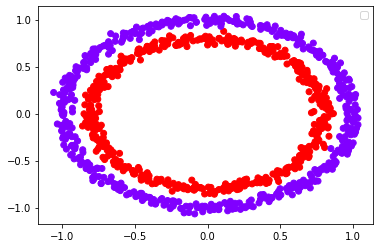

In [7]:
plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow")
plt.legend()

In [ ]:
# prepare model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="relu"))
# output layer, if add on the activation layer is sigmoid then the from_logit should be false in the cost function
model.add(tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)) 

# from logits True: perform sigmoid and calculate cross entropy
# from logits false: calculate cross entropy only (assume perform sigmoid on the output layer already)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics = ["accuracy"]
              )

history = model.fit(X,y,epochs=20,batch_size=32)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6775 - accuracy: 0.5550
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6101 - accuracy: 0.6820
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8510
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.9550
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1120 - accuracy: 0.9960
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.9950
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.9890
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0799 - accuracy: 0.9860
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9440
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9860
Epoch 11/20
32/32 [

In [ ]:
model.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9990


[0.01583029516041279, 0.9990000128746033]

doing binary class classification.


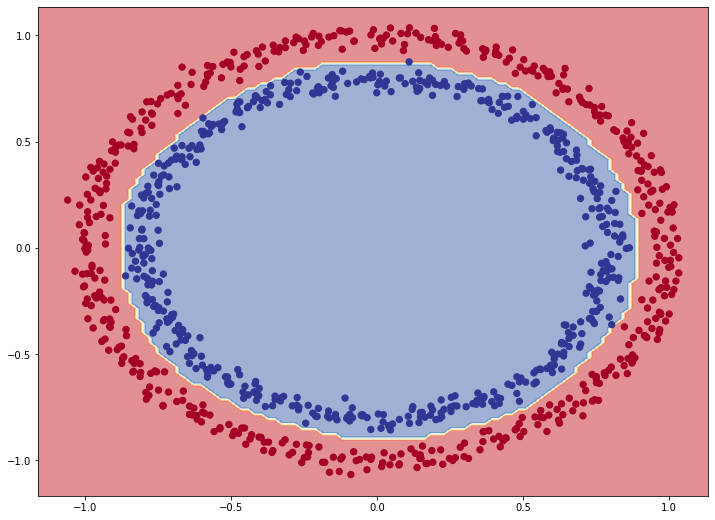

In [ ]:
plot_decision_boundary(model,X,y)

## 2022.06.17 - NN Classification Part 2
- can use tensorflow playground to constructu a poc neural network
- then go back to the IDE use tensorflow create Deep Learning Model/Neural Network


### activation function 
- `actiivation function` : the function that used to learn the pattern in the neural network
  - support linear(y=x) and non-linear actiivatioon function, it is kind like give you a linear/nonlinear lines so that you can draw/learn the any pattern from the data

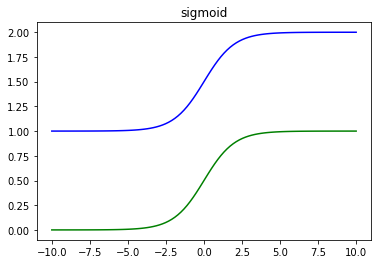

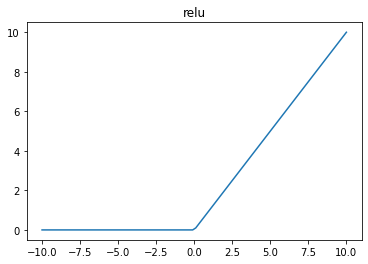

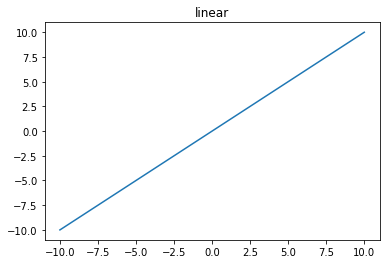

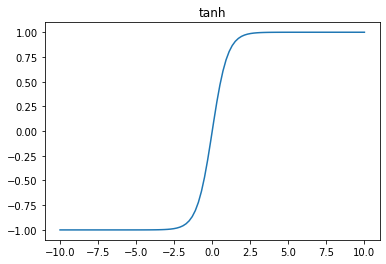

In [ ]:
# replicating non-linear function using tensorflow
z_data = tf.linspace(-10,10,100)

# just differentiate the line is generated from udf or tensorflow built-in function
plt.plot(z_data,sigmoid(z_data)+1,c="blue")
plt.plot(z_data,tf.keras.activations.sigmoid(z_data),c="green")
plt.title("sigmoid")
plt.show()

plt.plot(z_data,relu_func(z_data))
plt.title("relu")
plt.show()

plt.plot(z_data,linear_func(z_data))
plt.title("linear")
plt.show()

plt.plot(z_data,tf.keras.activations.tanh(z_data))
plt.title("tanh")
plt.show()

In [ ]:
model.evaluate(X,y)

32/32 [==============================] - 1s 3ms/step - loss: 0.0096 - accuracy: 1.0000


[0.009553828276693821, 1.0]

In [ ]:
df = pd.DataFrame(history.history)
df.plot()

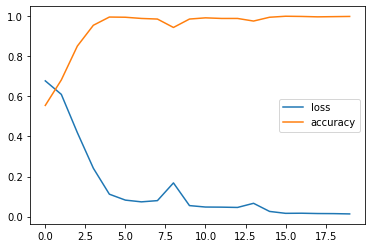

### Evaluate/Improve/Visualize the model performance

In [ ]:
n_sample = 1000
X,y = make_circles(n_samples=1000,random_state=42)

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
X_train,X_test = X[:800],X[800:]
y_train,y_test = y[:800],y[800:]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4,input_shape=[X_train.shape[1]],activation="relu"))
model.add(tf.keras.layers.Dense(4,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

# can take str type as string but cannot moodified the settings of that method
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.05),
              metrics=["accuracy"])

history = model.fit(X_train,y_train,epochs=50,verbose=0)


In [ ]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 9.6605e-04 - accuracy: 1.0000


[0.0009660481591708958, 1.0]

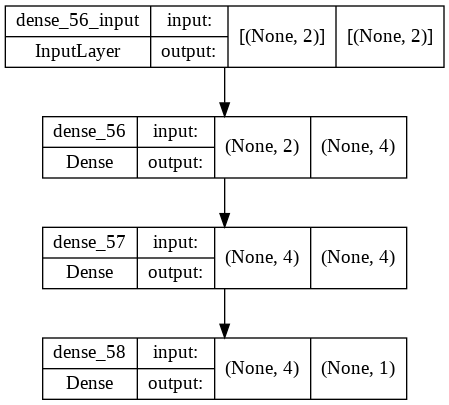

In [ ]:
plot_model(model,show_shapes=True)

doing binary class classification.
doing binary class classification.


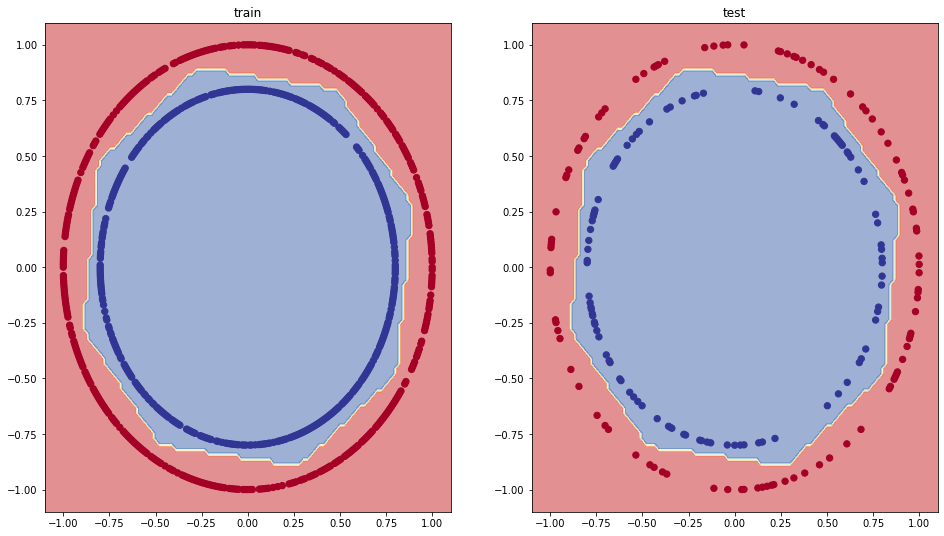

In [ ]:
# want to plot the subplot
plt.figure(figsize=(16,9))

plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model,X_train,y_train)


plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model,X_test,y_test)
plt.show()

Text(0.5, 1.0, 'Model loss curves')

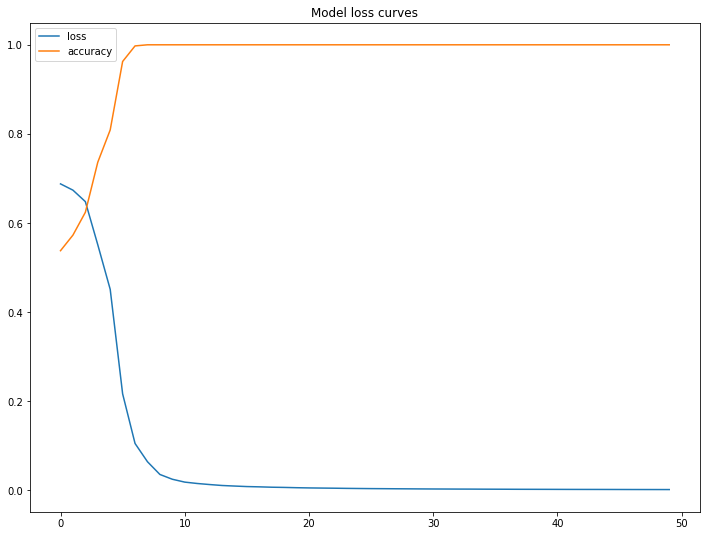

In [ ]:
# plot the training history 
df = pd.DataFrame(history.history)
df.plot(figsize=(12,9))
plt.title("Model loss curves")

## 2022.06.18 NN Classification Part 3

### Using callback - find the best  lr rate
- callback. the function that we can use and be executed during training
- how to find the best optimal lr rate
  - basically to see when lr-rate = ? => the loss decrease the most
  - usually we can use the (1,0.1,0.01,0.001,0.0001) as initial learning rate and slowly tune the lr rate
  - https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler

In [ ]:
10**(2/20)*1e-4

0.00012589254117941674

In [8]:
def schedule(epoch):
  """
  Purpose:
    can use lambda function or function to taken to the input of tensorflow callback for learning rate scheduler
  description:
    use epoch to incremental the learning rate by the formula, 
    the int epoch/20 will be calculated to the floating point
  returns:
    learning-rate
  """
  return 1e-4 * 10**(epoch/20)

model = tf.keras.models.Sequential(layers=[
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")                                        
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)
history = model.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler],verbose=1)

NameError: ignored

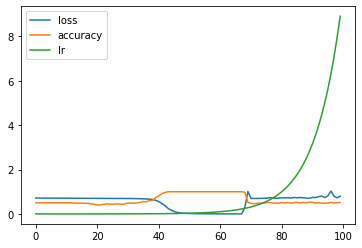

In [ ]:
df = pd.DataFrame(history.history)
df.plot()

0.22387214


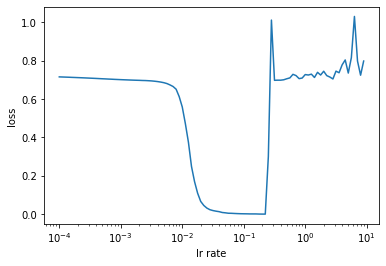

In [ ]:
# plot the loss and learning rate to figure which learning have the lowest cost
x_data = schedule(tf.range(100,dtype=tf.dtypes.float32))
y_data = history.history["loss"]

# only scale on the plot but won't scale data itself.
plt.semilogx(x_data,y_data,)
plt.xlabel("lr rate")
plt.ylabel("loss")


# so the suitable learning rate should be between 1e-1 1e0
optimal_lr_rate = x_data[tf.argmin(y_data)].numpy()
print(optimal_lr_rate)

In [ ]:
# create another model with optimal learning rate

tf.random.set_seed(42)

model = tf.keras.models.Sequential(layers=[
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")                                        
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.22),
              metrics = ["accuracy"])


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)
history = model.fit(X_train,y_train,epochs=20,verbose=0)

In [ ]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 9.7127e-04 - accuracy: 1.0000


[0.0009712689206935465, 1.0]

doing binary class classification.
doing binary class classification.


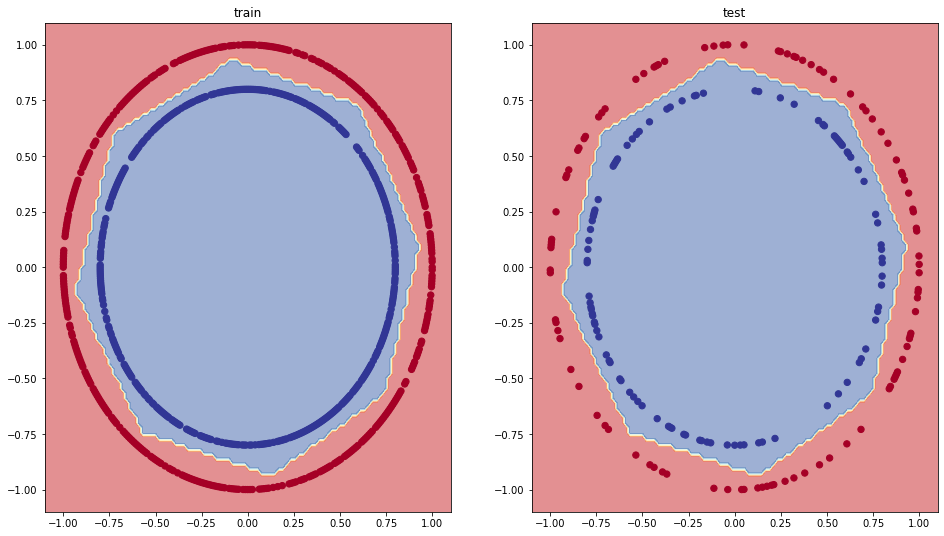

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plot_decision_boundary(model,X_train,y_train)
plt.title("train")

plt.subplot(1,2,2)
plot_decision_boundary(model,X_test,y_test)
plt.title("test")
plt.show()

### Model Evaluation Metrics
- Multiple kinds of evaluation metrics on classification
  - choose which one, based on your business purpose
  - kinds:
    - accuracy, precision, recall, F1-Score, roc-auc curve, classification report
       - accuracy is not suitable for really imbalanced data
    - confusion matrix(just a way to represent the relationship between actual and predicted label/class)
  - waht is precision/recall tradeoff => when increasing the precision, the recall will decrease and vice versa
 

In [10]:
def plot_confusion_matrix(y_true,y_pred,classes=None,figsize=(20,16)):
  fig, ax = plt.subplots(figsize=figsize)

  # only calculate the TPR and FPR
  cm = confusion_matrix(y_true,y_pred)
  c_norm = cm / cm.sum(axis=1)[:,np.newaxis]
  cmt = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cmt)

  # format the ax and make it prettier
  ax.xaxis.set_ticks_position("bottom")
  ax.xaxis.tick_bottom()
  ax.title.set_size(20)
  ax.xaxis.label.set_size(10)
  ax.yaxis.label.set_size(10)

  labels = classes if classes else np.arange(cm.shape[0])

  ax.set(
      title = "Confusion Matrix",
      xlabel = "Predicted Label",
      ylabel = "Actual Label",
      xticks = np.arange(cm.shape[0]),
      yticks = np.arange(cm.shape[0]),
      xticklabels = labels,
      yticklabels = labels
  )

  threshold = (cm.max()+cm.min()) / 2

  # the text cords is same as the screen, the y-axis is going down
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[0])):
    plt.text(j,i,f"{cm[i,j]} ({c_norm[i,j]*100:.1f}%)",
            size=10,
            horizontalalignment="center",
            color = "white" if cm[i,j] > threshold else "black")


In [ ]:
loss,accuracy = model.evaluate(X_test,y_test,verbose=0)
print(f"loss:{loss}, accuracy:{accuracy*100}%")

loss:0.0009712689206935465, accuracy:100.0%


In [11]:
y_pred = np.round(model.predict(X_test))
acc = tf.keras.metrics.Accuracy()
acc.update_state(tf.expand_dims(y_test,axis=-1),y_pred)
acc.result().numpy()

NameError: ignored

In [12]:
plot_confusion_matrix(y_test,y_pred)

NameError: ignored

### Multiclass Classification - MNIST
- https://www.tensorflow.org/tutorials/keras/classification
- https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb
- Image classification using tensorflow datasets with DNN model

In [15]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
#y_train = tf.one_hot(y_train,depth=len(set(y_train)))

# Ten category but in thte data only keep the categoory that the sample is.
X_train.shape,y_train.shape,set(y_train),len(set(y_train))

((60000, 28, 28), (60000,), {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, 10)

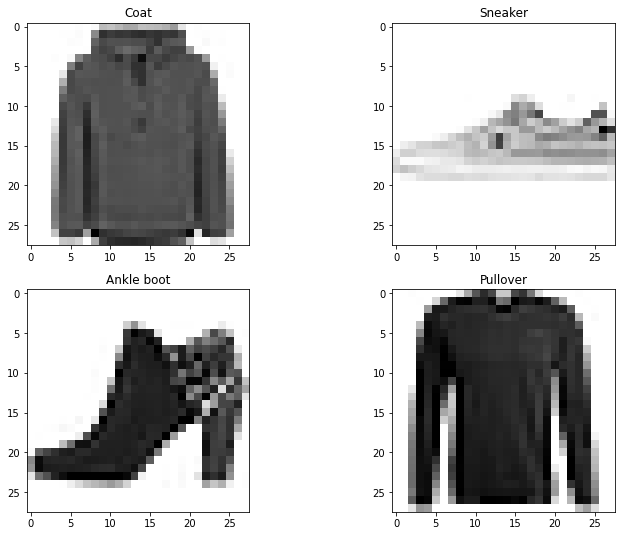

In [ ]:
# to random check the data with human-readable data
## for the convertiing the numeric label to human-readable format
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import random

plt.figure(figsize=(12,9))
for ind in range(4):
  plt.subplot(2,2,ind+1) # ind in sub should be >= 1 at least
  random_choice = random.choice(range(X_train.shape[0]))
  plt.imshow(X_train[random_choice],cmap=plt.cm.binary)
  plt.title(class_names[y_train[random_choice]])

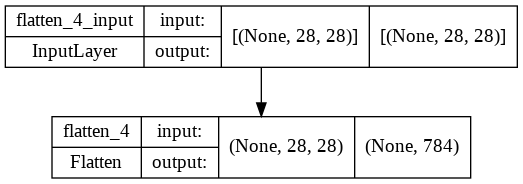

In [ ]:
flatten_model = tf.keras.models.Sequential()
flatten_model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
flatten_model.output_shape # to see the output shape
plot_model(flatten_model,show_shapes=True)

In [ ]:
# create model for multi-classification
tf.random.set_seed(42)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(4,activation="relu"))
model.add(tf.keras.layers.Dense(4,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))

# if use the categorical crossentropy, the labels should be N classes
# if use SparseCategoricalCrossentropy, the labels hsould be just 1 that specified which classess
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# validation data set just used to evaluate the model perfoormance not used during the training
# model still use the training data set to learn the pattern from the cost function.s
history = model.fit(
      X_train,
      tf.one_hot(y_train,10),
      epochs=10,
      validation_data=(X_test,tf.one_hot(y_test,10))
      )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1643 - accuracy: 0.1609 - val_loss: 1.8304 - val_accuracy: 0.2048
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7084 - accuracy: 0.2484 - val_loss: 1.6614 - val_accuracy: 0.2850
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6351 - accuracy: 0.2837 - val_loss: 1.6084 - val_accuracy: 0.2756
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6108 - accuracy: 0.2912 - val_loss: 1.6029 - val_accuracy: 0.3046
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6025 - accuracy: 0.2993 - val_loss: 1.5837 - val_accuracy: 0.3139
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5838 - accuracy: 0.3120 - val_loss: 1.5673 - val_accuracy: 0.3281
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5788 - accuracy: 0.3183 - val_loss: 1.5687 - val_accuracy:

In [ ]:
# flattten: no parameters, flatten is hidden layer lol
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_71 (Dense)            (None, 4)                 3140      
                                                                 
 dense_72 (Dense)            (None, 4)                 20        
                                                                 
 dense_73 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


### Improve Model performance
- do the feature engineering
- the nerual network prefer normalized data which might get better performance

In [115]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
#y_train = tf.one_hot(y_train,depth=len(set(y_train)))

# Ten category but in thte data only keep the categoory that the sample is.
X_train.shape,y_train.shape,set(y_train),len(set(y_train))

((60000, 28, 28), (60000,), {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, 10)

In [116]:
### to normalize the images
X_train_norm = X_train / X_train.max()
X_test_norm = X_test / X_train.max()

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [118]:
# create model for multi-classification
tf.random.set_seed(42)

model_n = tf.keras.models.Sequential()
model_n.add(tf.keras.layers.Input(shape=(28,28)))
model_n.add(tf.keras.layers.Flatten())
model_n.add(tf.keras.layers.Dense(4,activation="relu"))
model_n.add(tf.keras.layers.Dense(4,activation="relu"))
model_n.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))

# if use the categorical crossentropy, the labels should be N classes
# if use SparseCategoricalCrossentropy, the labels hsould be just 1 that specified which classess
model_n.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# learning scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# validation data set just used to evaluate the model perfoormance not used during the training
# model still use the training data set to learn the pattern from the cost function.s
history_n = model_n.fit(
        X_train_norm,
        y_train,
        epochs=40,
        validation_data=(X_test_norm,y_test),
        callbacks = [lr_scheduler]
      )

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9126 - accuracy: 0.3121 - val_loss: 1.6130 - val_accuracy: 0.4120 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3422 - accuracy: 0.5300 - val_loss: 1.1290 - val_accuracy: 0.6441 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9738 - accuracy: 0.6798 - val_loss: 0.9039 - val_accuracy: 0.6927 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8289 - accuracy: 0.7134 - val_loss: 0.8146 - val_accuracy: 0.7149 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7603 - accuracy: 0.7366 - val_loss: 0.7615 - val_accuracy: 0.7366 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7181 - accuracy: 0.7506 - val_loss: 0.7296 - val_accuracy: 0.7448 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [============

KeyboardInterrupt: ignored

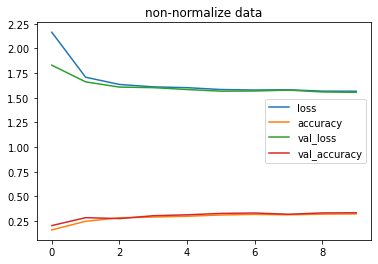

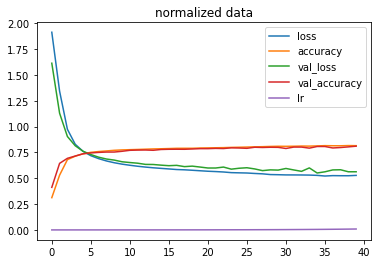

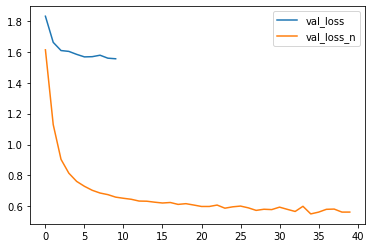

In [ ]:
df = pd.DataFrame(history.history)
df_n = pd.DataFrame(history_n.history)
df.plot(title="non-normalize data")
df_n.plot(title="normalized data")

# combine the different models
df_n = df_n.rename({col:f"{col}_n" for col in df_n.columns},axis=1)
final = pd.concat([df,df_n],axis=1)
final[["val_loss","val_loss_n"]].plot()

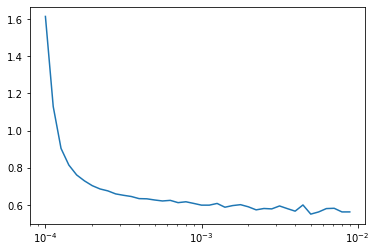

In [ ]:
### find the optimial lr rate, the 0.001 might be the good choice for the learning rate
### can use learning rate as axis and do scale to ma
plt.semilogx(df_n["lr_n"],df_n["val_loss_n"])

## 2022.06.19 - NN Classification Part 4

### Evaluate Model Performance for multiclass classification model

In [ ]:
### confusion_matrix
y_pred_prob = model_n.predict(X_test_norm)
y_pred_class = tf.argmax(y_pred_prob,axis=1)
y_pred_class[0],y_test[0],class_names[y_pred_class[0]]

(<tf.Tensor: shape=(), dtype=int64, numpy=9>, 9, 'Ankle boot')

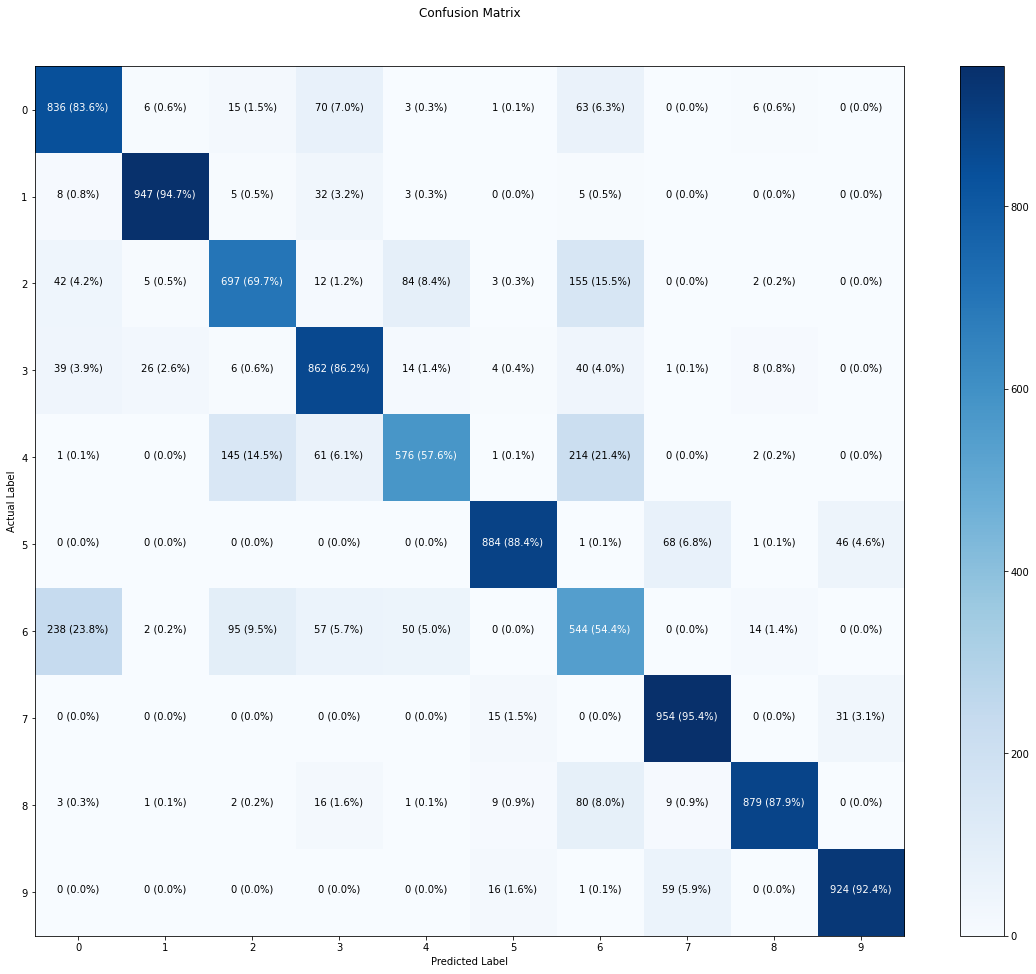

In [ ]:
plot_confusion_matrix(y_test,y_pred_class,figsize=(20,16))

### Access More Model Prediction

In [ ]:
def plot_random_image(model,images,actual_labels,classes):
  import random

  # pick up random one image.
  i = random.randint(0,len(images))
  target_image = images[i]
  y_pred_prob = model.predict(images[i].reshape(1,28,28)) # convert to batch size as 1,x,y
  pred_labels = classes[tf.argmax(y_pred_prob,axis=1)[0]]
  true_labels = classes[actual_labels[i]]

  plt.imshow(images[i],cmap=plt.cm.binary)

  color = "red" if pred_labels != true_labels else "green"

  # only show the maximum prob that will be used to categorized the sample into the predicted label
  plt.xlabel("Pred:{pred_labels}, {pred_prob:2.0f}% | Actual:{true_labels}".format(pred_labels = pred_labels,
                                                                                 pred_prob = 100*tf.math.reduce_max(y_pred_prob),
                                                                                 true_labels = true_labels),
             color=color)


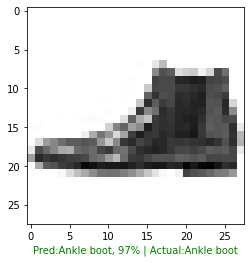

In [ ]:
plot_random_image(model_n,X_test_norm,y_test,class_names)

### What pattern is our model learning
- to see the model weights and bias
  - weights and bias was random initialized in the beginning of training
    - bias, the amount of bias vector will impact the next layer
  - can define own initializer for weights and bias
    - kernal intializer
    - bias initializer

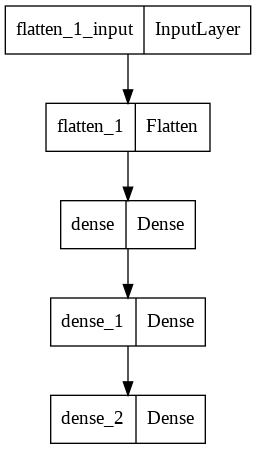

In [ ]:
plot_model(model)

In [ ]:
weights,bias = model_n.layers[1].get_weights()
weights,bias

(array([[-0.20234244, -0.01220137,  1.4737984 , -3.0115774 ],
        [ 0.17697349,  2.2917857 ,  2.544093  , -2.6929283 ],
        [ 1.9402243 ,  2.1603646 ,  0.19166991, -3.7425714 ],
        ...,
        [ 0.6155212 ,  0.6787462 , -3.7987332 ,  0.585738  ],
        [ 1.0403218 ,  2.0622373 , -2.6663995 ,  1.3264166 ],
        [ 1.5180943 ,  0.83468884, -2.34343   , -0.78508914]],
       dtype=float32),
 array([2.9845045, 4.7658014, 3.6572356, 2.3452117], dtype=float32))

### Exercises - Make Moons

In [150]:
from sklearn.datasets import make_moons
# binary classification problem

In [151]:
n_samples = 1000
XX,yy = make_moons(n_samples=n_samples,random_state=42)
XX_train = XX[:800]
yy_train = yy[:800]
XX_test = XX[800:]
yy_test = yy[800:]

In [153]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model.fit(XX_train,
          yy_train,
          epochs=100,
          callbacks=[lr_scheduler],
          validation_data=(XX_test,yy_test),
          verbose=0)

In [155]:
model.evaluate(XX_test,yy_test)

7/7 [==============================] - 0s 5ms/step - loss: 6.6504e-07 - accuracy: 1.0000


[6.650378736594575e-07, 1.0]

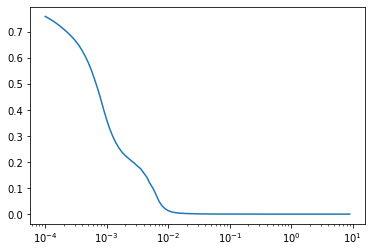

In [156]:
# lr=0.01 shoould be fine
df = pd.DataFrame(history.history)
plt.semilogx(df["lr"],df["loss"])

doing binary class classification.


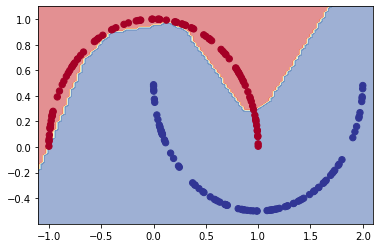

In [157]:
# looks good for decision boundary
plot_decision_boundary(model,XX_test,yy_test,False)

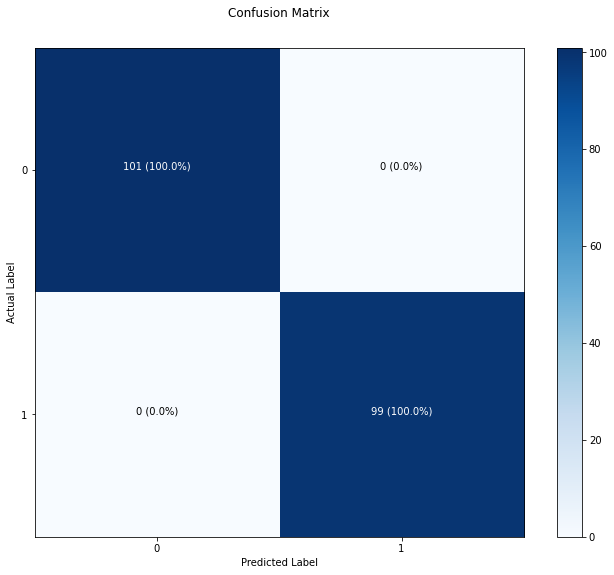

In [ ]:
yy_pred_label = np.round(sigmoid(model.predict(XX_test)))
plot_confusion_matrix(yy_test,yy_pred_label,figsize=(12,9))

### Exercises - MNIST
- https://www.tensorflow.org/tutorials/keras/classification

In [ ]:
# MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
#y_train = tf.one_hot(y_train,depth=len(set(y_train)))

# Ten category but in thte data only keep the categoory that the sample is.
X_train.shape,y_train.shape,set(y_train),len(set(y_train))

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, 10)

In [ ]:
### to normalize the images
X_train_norm = X_train / X_train.max()
X_test_norm = X_test / X_train.max()

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [ ]:
!nvidia-smi

Sun Jun 19 06:43:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    29W /  70W |    432MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# create model for multi-classification
tf.random.set_seed(42)

model_n = tf.keras.models.Sequential()
model_n.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_n.add(tf.keras.layers.Dense(20,activation="relu"))
model_n.add(tf.keras.layers.Dropout(0.1))
model_n.add(tf.keras.layers.Dense(20,activation="tanh"))
model_n.add(tf.keras.layers.Dense(20,activation="relu"))
model_n.add(tf.keras.layers.Dropout(0.1))
model_n.add(tf.keras.layers.Dense(20,activation="tanh"))
model_n.add(tf.keras.layers.Dense(20,activation="relu"))
model_n.add(tf.keras.layers.Dropout(0.1))
model_n.add(tf.keras.layers.Dense(20,activation="tanh"))
model_n.add(tf.keras.layers.Dense(10))

# if use the categorical crossentropy, the labels should be N classes
# if use SparseCategoricalCrossentropy, the labels hsould be just 1 that specified which classess
model_n.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# learning scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# validation data set just used to evaluate the model perfoormance not used during the training
# model still use the training data set to learn the pattern from the cost function.s
history_n = model_n.fit(
        X_train_norm,
        y_train,
        epochs=100,
        validation_data=(X_test_norm,y_test)
        #callbacks = [lr_scheduler]
      )

Epoch 1/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8585 - accuracy: 0.6795 - val_loss: 0.5812 - val_accuracy: 0.8035
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5909 - accuracy: 0.7932 - val_loss: 0.5183 - val_accuracy: 0.8238
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5406 - accuracy: 0.8144 - val_loss: 0.4801 - val_accuracy: 0.8354
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5088 - accuracy: 0.8276 - val_loss: 0.4606 - val_accuracy: 0.8484
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4948 - accuracy: 0.8302 - val_loss: 0.4473 - val_accuracy: 0.8477
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4844 - accuracy: 0.8334 - val_loss: 0.4401 - val_accuracy: 0.8466
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4752 - accuracy: 0.8347 - val_loss: 0.4753 - val_ac

In [ ]:
model_n.evaluate(X_test_norm,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3867 - accuracy: 0.8709


[0.3867153525352478, 0.8708999752998352]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


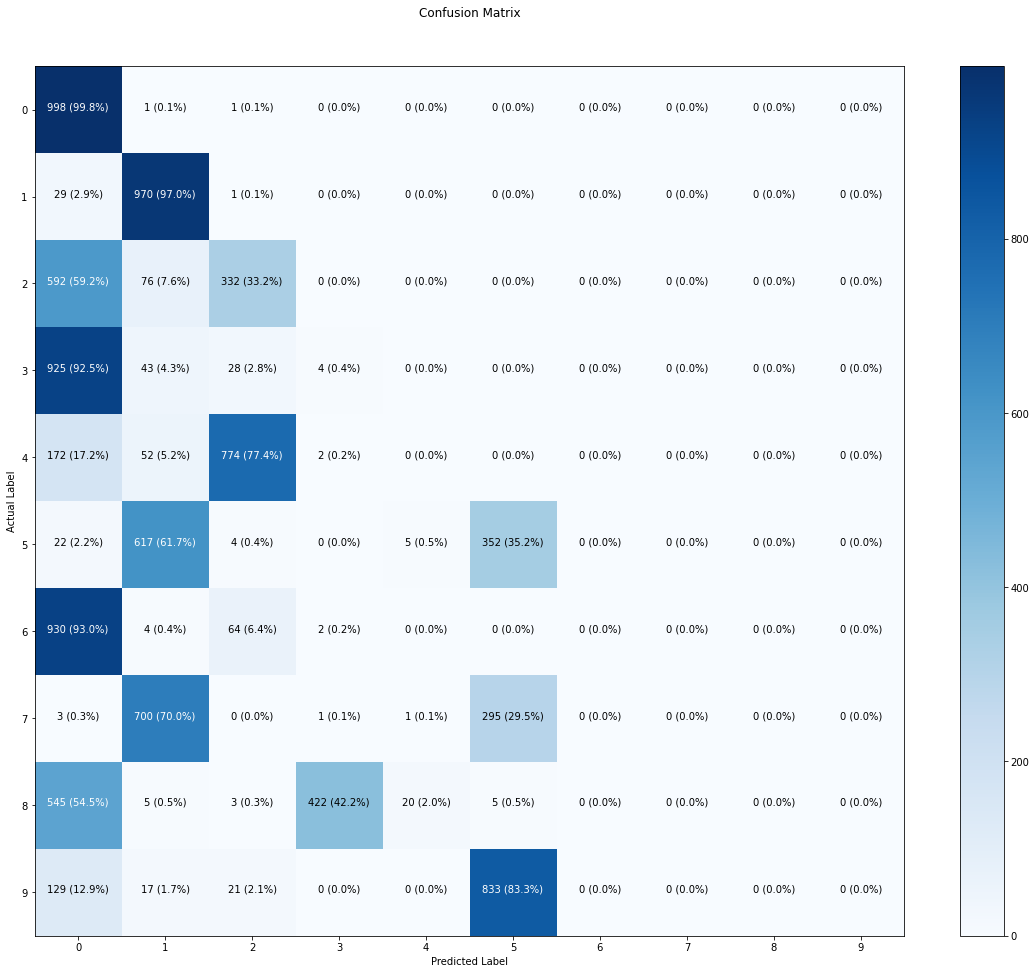

In [ ]:
y_pred = tf.argmax(softmax(model_n.predict(X_test_norm)),axis=1)
plot_confusion_matrix(y_test,y_pred)

In [ ]:
df = pd.DataFrame(history_n.history)

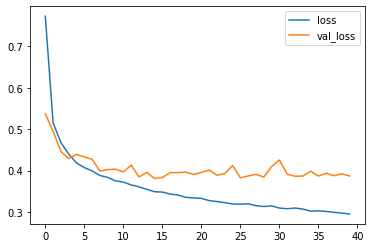

In [ ]:
df[["loss","val_loss"]].plot()

In [ ]:
def softmax(z_tensor):
  temp_tensor = tf.exp(z_tensor)
  return temp_tensor / tf.reshape(tf.math.reduce_sum(temp_tensor,axis=1),shape=(-1,1))

In [ ]:
def plot_random_images(model,images,actual_labels,classes,n_samples_vec=1,certain_class=None):
  """
  Plot multiple images by randonmly picking up the image from data
  and also can plot the pic with a specific class
  
  """
  
  import random

  matrix_samples = n_samples_vec**2

  if certain_class and certain_class not in classes:
    raise Exception("Please give a valid class define in the classes params")

  if certain_class:
    class_names_dict = {v:k for k,v in enumerate(classes)}
    class_id = class_names_dict.get(certain_class)
    filter_tensor = actual_labels == class_id
    images = images[filter_tensor]
    actual_labels = actual_labels[filter_tensor]

  plt.figure(figsize=(20,20))
  # pick up random one image.
  for loc in range(matrix_samples):
    plt.subplot(n_samples_vec,n_samples_vec,loc+1)
    
    i = random.randint(0,len(images))
    target_image = images[i]
    y_pred_prob = softmax(model.predict(target_image.reshape(1,28,28))) # convert to batch size as 1,x,y
    pred_labels = classes[tf.argmax(y_pred_prob,axis=1)[0]]
    true_labels = classes[actual_labels[i]]
 

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(target_image,cmap=plt.cm.binary)
    
   
    color = "red" if pred_labels != true_labels else "green"

    # only show the maximum prob that will be used to categorized the sample into the predicted label
    plt.xlabel("Pred:{pred_labels}, {pred_prob:2.0f}% | Actual:{true_labels}".format(pred_labels = pred_labels,
                                                                                  pred_prob = 100*tf.math.reduce_max(y_pred_prob),
                                                                                  true_labels = true_labels),
              color=color)
  plt.show()


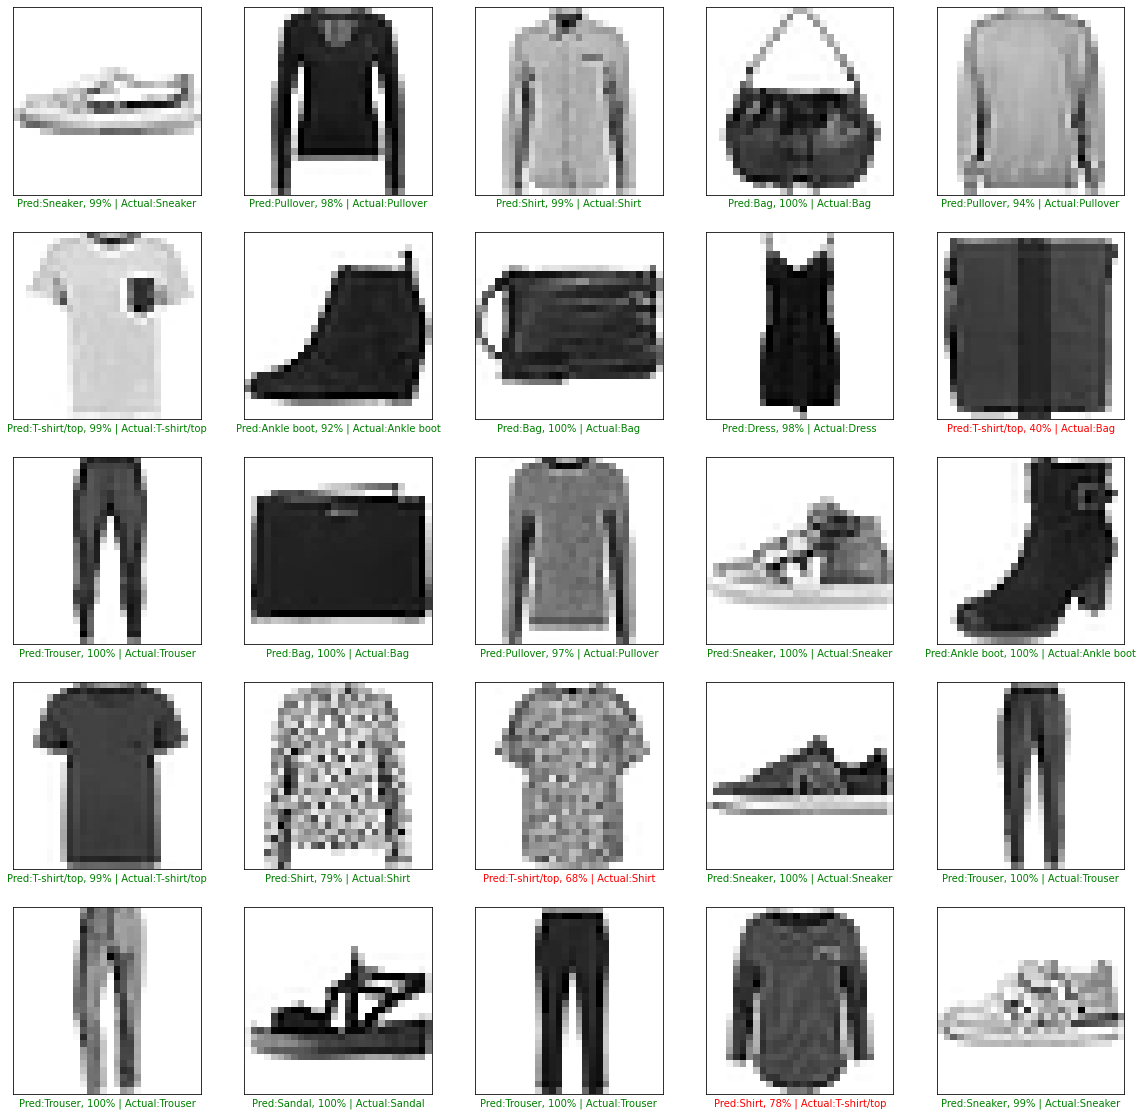

In [ ]:
# random choose n**2 samples and show the predictive category/prob and actual category
plot_random_images(model_n,X_test_norm,y_test,class_names,n_samples_vec=5)

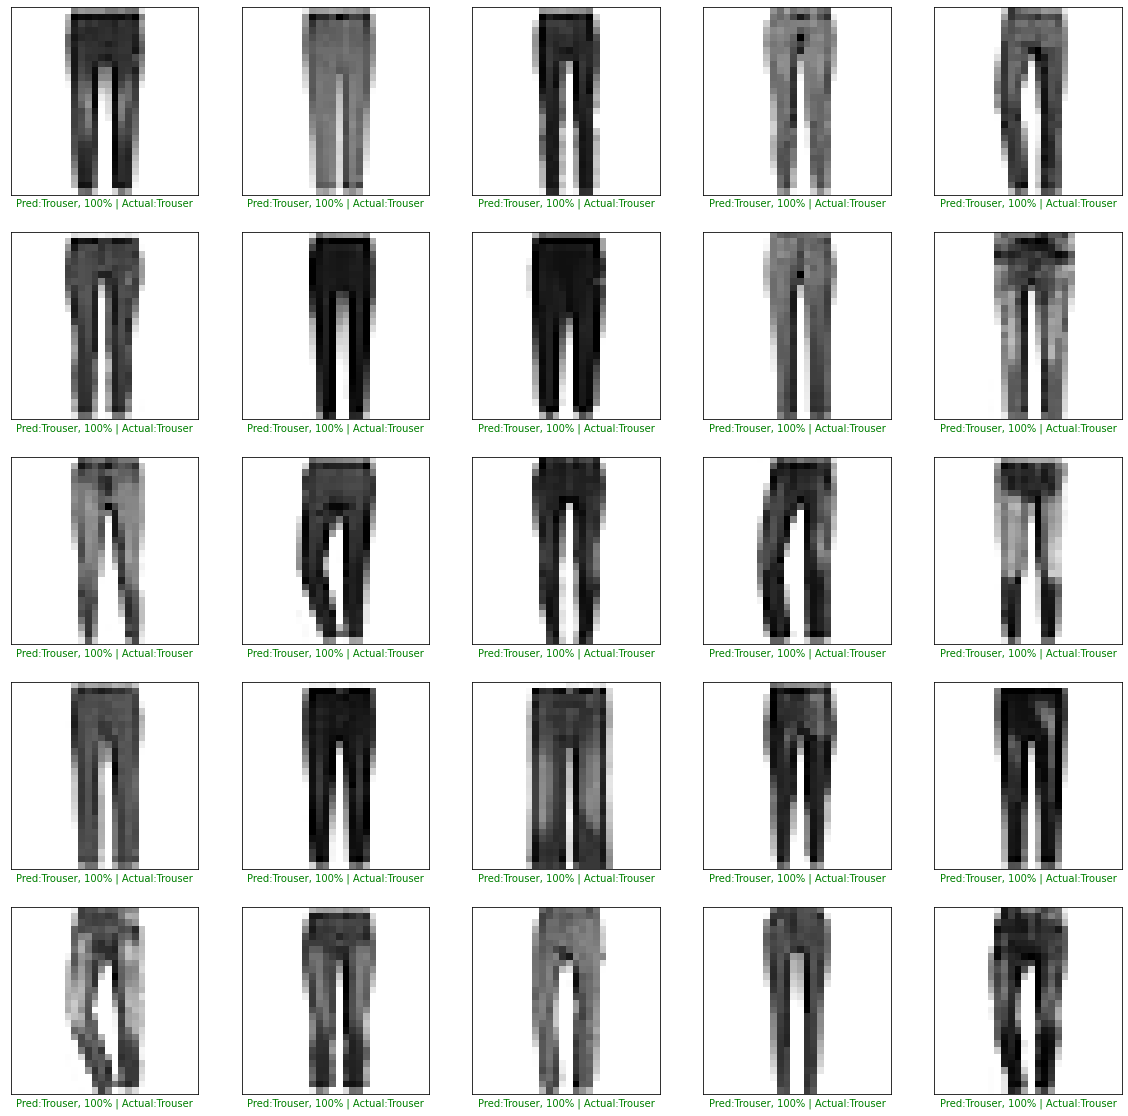

In [ ]:
# random choose n**2 samples and show the predictive category/prob and actual category on the specific class
plot_random_images(model_n,X_test_norm,y_test,class_names,n_samples_vec=5,certain_class="Trouser")